Tópicos:
1. Limpieza de datos
2. EDA
3. Tipos de datos y Binning

Para la limpieza de datos trabajaremos con el CSV "Data", el cual tiene un par de datos grandes, primero leeremos los datos e importaremos las librerías.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.isnull().sum() #así se la cantidad de datos con NaN


id             0
age            1
gender         0
height         2
weight         2
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Si queremos eliminar los registros que contienen al menos un NaN, se utiliza el .dropna()

In [ ]:
df_drop = df.dropna()
df_drop

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168.0,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156.0,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165.0,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169.0,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156.0,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70001,99993,19240,2,168.0,76.0,120,80,1,1,1,0,1,0
70002,99995,22601,1,158.0,126.0,140,90,2,2,0,0,1,1
70003,99996,19066,2,183.0,105.0,180,90,3,1,0,1,0,1
70004,99998,22431,1,163.0,72.0,135,80,1,2,0,0,0,1


In [ ]:
df_drop.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.dropna(axis=1) #elimina columnas no lo hagan pls

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,2,110,80,1,1,0,0,1,0
1,1,1,140,90,3,1,0,0,1,1
2,2,1,130,70,3,1,0,0,0,1
3,3,2,150,100,1,1,0,0,1,1
4,4,1,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
70001,99993,2,120,80,1,1,1,0,1,0
70002,99995,1,140,90,2,2,0,0,1,1
70003,99996,2,180,90,3,1,0,1,0,1
70004,99998,1,135,80,1,2,0,0,0,1


La otra opción para tabajar con los NaN es el .fillna()

In [ ]:
df_filled = df.fillna(0)
df_filled[df_filled['height'] == 0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
58,73,15901,2,0.0,84.0,140,90,1,1,1,0,1,1
377,527,17740,1,0.0,74.0,120,80,2,2,0,0,0,0


In [ ]:
df_drop.shape

(70001, 13)

In [ ]:
df_filled.shape

(70006, 13)

OJO, el fillna() puede hacer que cambien ciertos parámetros de los datos, por lo cual hay que usarlos con cuidado

In [ ]:
df_filled['height'].describe()

count    70006.000000
mean       164.354598
std          8.257134
min          0.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [ ]:
df_drop['height'].describe() #miren el mean y el std, si hubieran muchos NA cambiaría mucho más

count    70001.000000
mean       164.359095
std          8.210483
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

Qué pasa si me aparece una palabra entre muchos datos numéricos de una serie?



In [ ]:
df['age'].mean()

19468.895044356508

In [ ]:
df[df['age'] == "No adjuntado"]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


Pandas los considerará a todos, incluyendo los datos numéricos, como PALABRAS en vez de NÚMEROS, la mayoría de las veces se puede solucionar con el pd.to_numeric()

In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [ ]:
df['age'].mean()

19468.895044356508

Y qué pasa con los datos duplicados?

In [ ]:
df[df.duplicated()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
122,158,19109.0,2,180.0,84.0,120,80,1,1,0,0,0,0
198,158,19109.0,2,180.0,84.0,120,80,1,1,0,0,0,0
315,359,21897.0,1,160.0,55.0,120,80,1,1,0,0,1,1
378,359,21897.0,1,160.0,55.0,120,80,1,1,0,0,1,1
454,567,22148.0,1,156.0,68.0,120,80,3,3,0,0,1,1
493,567,22148.0,1,156.0,68.0,120,80,3,3,0,0,1,1


In [ ]:
df.drop_duplicates(keep='first',inplace=True) #first hace que se quede con el primer dato de los respetidos y el resto pa juera
df[df.duplicated()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


Otro punto a considerar siempre, los máximos y mínimos.

In [ ]:
df.max()

id             99999.0
age            23713.0
gender             2.0
height           250.0
weight           200.0
ap_hi          14020.0
ap_lo          11000.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
dtype: float64

In [ ]:
df.min()

id                 0.0
age            10798.0
gender             1.0
height            55.0
weight            10.0
ap_hi           -120.0
ap_lo            -70.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             0.0
cardio             0.0
dtype: float64

Para eliminar los datos se crean df's filtrados

In [ ]:
df = df[df['ap_hi'] <= 250]
df = df[df['ap_lo'] <= 250]
df = df[df['ap_hi'] >= 40]
df = df[df['ap_lo'] >= 40]
df = df[df['weight'] >= 30]
df.max() #me genera un nuevo df con los datos filtrados

id             99999.0
age            23713.0
gender             2.0
height           250.0
weight           200.0
ap_hi            240.0
ap_lo            190.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
dtype: float64

In [ ]:
df.min()

id                 0.0
age            10798.0
gender             1.0
height            55.0
weight            30.0
ap_hi             60.0
ap_lo             40.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             0.0
cardio             0.0
dtype: float64

In [ ]:
df.shape

(70006, 13)

**EDA**

In [ ]:
#cargamos nuestros datos
import pandas as pd
import numpy as np
peliculas = pd.read_csv('imdb_top_1000.csv')
peliculas

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
peliculas.shape

(1000, 16)

Al momento de hacer un EDA tenemos que fijarnos en distintos datos: medias, modas, medianas, etc..., en este caso lo más útil es usar describe()

In [ ]:
ratings = peliculas['IMDB_Rating']
ratings.describe()

count    1000.000000
mean        7.949300
std         0.275491
min         7.600000
25%         7.700000
50%         7.900000
75%         8.100000
max         9.300000
Name: IMDB_Rating, dtype: float64

In [ ]:
ratings.mean()

7.949300000000012

In [ ]:
ratings.std()

0.27549120749200917

In [ ]:
ratings.mode()

0    7.7
dtype: float64

In [ ]:
ratings.median()

7.9

In [ ]:
ratings.quantile(0.8) #el valor da el porcentaje deseado

8.1

In [ ]:
ratings.skew() #oblicuidad

1.016964453611272

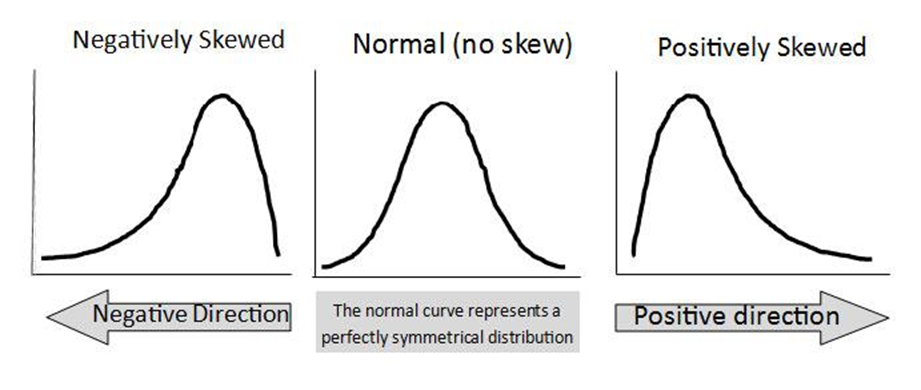

In [ ]:
peliculas.groupby(peliculas['Star1']).size().sort_values(ascending=False)

Star1
Tom Hanks           12
Robert De Niro      11
Clint Eastwood      10
Al Pacino           10
Humphrey Bogart      9
                    ..
Mario Casas          1
Marion Cotillard     1
Marjane Satrapi      1
Martin Freeman       1
Jonathan Pryce       1
Length: 660, dtype: int64

In [ ]:
peliculas.groupby(peliculas['Released_Year']).size().sort_values(ascending=False)

Released_Year
2014    32
2004    31
2009    29
2016    28
2013    28
        ..
1930     1
1936     1
1937     1
1943     1
1920     1
Length: 100, dtype: int64

In [24]:
peliculas.groupby(peliculas['Released_Year'])['Gross'].sum().sort_values(ascending=False)

Released_Year
2009.0    2937170585
2014.0    2755629221
2018.0    2607757362
2016.0    2595557425
2012.0    2542616037
             ...    
1922.0             0
2020.0             0
1932.0             0
1943.0             0
1920.0             0
Name: Gross, Length: 99, dtype: int64

Arreglar el Gross

In [ ]:
peliculas['Gross'] = peliculas['Gross'].replace({',': ''}, regex=True)
peliculas['Gross']

0       28341469
1      134966411
2      534858444
3       57300000
4        4360000
         ...    
995          NaN
996          NaN
997     30500000
998          NaN
999          NaN
Name: Gross, Length: 1000, dtype: object

In [ ]:
peliculas['Gross'] = peliculas['Gross'].replace(np.nan, 0)
peliculas['Gross'] = peliculas['Gross'].astype(int)
peliculas['Gross'].describe()

count    1.000000e+03
mean     5.653688e+07
std      1.032382e+08
min      0.000000e+00
25%      4.457098e+05
50%      1.070275e+07
75%      6.153989e+07
max      9.366622e+08
Name: Gross, dtype: float64

In [ ]:
peliculas.sort_values(by='Gross', ascending=False)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138 min,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000
623,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162 min,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625
60,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018,UA,149 min,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482
652,https://m.media-amazon.com/images/M/MV5BMDdmZG...,Titanic,1997,UA,194 min,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,https://m.media-amazon.com/images/M/MV5BMjRkY2...,"Aguirre, der Zorn Gottes",1972,NaN,95 min,"Action, Adventure, Biography",7.9,"In the 16th century, the ruthless and insane D...",NaN,Werner Herzog,Klaus Kinski,Ruy Guerra,Helena Rojo,Del Negro,52397,0
538,https://m.media-amazon.com/images/M/MV5BZDI2OT...,Amarcord,1973,R,123 min,"Comedy, Drama, Family",7.9,A series of comedic and nostalgic vignettes se...,NaN,Federico Fellini,Magali Noël,Bruno Zanin,Pupella Maggio,Armando Brancia,39897,0
522,https://m.media-amazon.com/images/M/MV5BOTMyZG...,Jûbê ninpûchô,1993,A,94 min,"Animation, Action, Adventure",7.9,A vagabond swordsman is aided by a beautiful n...,NaN,Yoshiaki Kawajiri,Kôichi Yamadera,Emi Shinohara,Takeshi Aono,Osamu Saka,34529,0
518,https://m.media-amazon.com/images/M/MV5BZDg0MW...,Mimi wo sumaseba,1995,U,111 min,"Animation, Drama, Family",7.9,A love story between a girl who loves reading ...,75.0,Yoshifumi Kondô,Yoko Honna,Issey Takahashi,Takashi Tachibana,Shigeru Muroi,51943,0


In [ ]:
#Ya se puede hacer bien el groupby
peliculas.groupby(peliculas['Released_Year'])['Gross'].sum().sort_values(ascending=False)

Released_Year
2009.0    2937170585
2014.0    2755629221
2018.0    2607757362
2016.0    2595557425
2012.0    2542616037
             ...    
1922.0             0
2020.0             0
1932.0             0
1943.0             0
1920.0             0
Name: Gross, Length: 99, dtype: int64

Respondamos las siguientes preguntas:

1. Cual es la ganacia promedio de las películas
6. En qué año se terminaron de publicar el 80% de las películas de esta lista?
4. Cual es el rating que más se repite entre las películas
7. Cuales datos numéricos tienen asimetría positiva y cuales negativa
1. Quienes son los 5 directores que más dinero han ganado con sus películas
2. Quienes son los 5 directores que han dirigido más películas
3. Cual es la media de ganancia que tienen el top 40 de películas
1. Si el rating promedio de un actor es el promedio de los ratings de las películas en las que ha aparecido, cuales son los 15 actores principales ('Star1') con mejor rating? y cuales son los 15 peores de la lista?

**CONSIDEREN QUE ESTAS SON LAS 1000 PELÍCULAS CON MEJORES RANKINGS EN IMDB**



Pregunta 1:


In [ ]:
peliculas['Gross'].mean()

56536877.976

Pregunta 2:

In [ ]:
peliculas['Released_Year'] = pd.to_numeric(peliculas['Released_Year'], errors='coerce')

In [25]:
peliculas['Released_Year'].quantile(0.8)

2012.0

Pregunta 3:

In [ ]:
peliculas['IMDB_Rating'].mode()

0    7.7
dtype: float64

Pregunta 4:

In [ ]:
peliculas.skew()

Released_Year   -0.939347
IMDB_Rating      1.016964
Meta_score      -0.605225
No_of_Votes      2.300011
Gross            3.410800
dtype: float64

Pregunta 5:

In [ ]:
peliculas.groupby(peliculas['Director'])['Gross'].sum().sort_values(ascending=False).head(5)

Director
Steven Spielberg     2478133165
Anthony Russo        2205039403
Christopher Nolan    1937454106
James Cameron        1748236602
Peter Jackson        1597312443
Name: Gross, dtype: int64

Pregunta 6:

In [ ]:
peliculas.groupby(peliculas['Director']).size().sort_values(ascending=False).head(5)

Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
dtype: int64

Pregunta 7:

In [ ]:
top40 = peliculas.head(40)
top40['Gross'].mean()

131966225.225

Pregunta 8:

In [ ]:
peliculas.groupby(peliculas['Star1'])['IMDB_Rating'].mean().sort_values(ascending=False).head(15)

Star1
Tim Robbins           9.300000
John Travolta         8.900000
Elijah Wood           8.800000
Lilly Wachowski       8.700000
Marlon Brando         8.650000
Jodie Foster          8.600000
Kátia Lund            8.600000
Lin-Manuel Miranda    8.600000
Suriya                8.600000
Roberto Benigni       8.600000
Daveigh Chase         8.600000
Mark Hamill           8.533333
Tsutomu Tatsumi       8.500000
Anthony Perkins       8.500000
Éric Toledano         8.500000
Name: IMDB_Rating, dtype: float64

In [ ]:
peliculas.groupby(peliculas['Star1'])['IMDB_Rating'].mean().sort_values(ascending=True).head(15)

Star1
Marion Cotillard      7.6
Jürgen Vogel          7.6
Emma Thompson         7.6
Emily Blunt           7.6
Elliott Gould         7.6
Scarlett Johansson    7.6
David Hemmings        7.6
Mikael Persbrandt     7.6
Michael Schwartz      7.6
Cillian Murphy        7.6
Chris Renaud          7.6
Chris Evans           7.6
Maribel Verdú         7.6
Steve Martin          7.6
Susanne Lothar        7.6
Name: IMDB_Rating, dtype: float64